In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/maestro-midi/maestro-v1.0.0/LICENSE
/kaggle/input/maestro-midi/maestro-v1.0.0/README
/kaggle/input/maestro-midi/maestro-v1.0.0/maestro-v1.0.0.csv
/kaggle/input/maestro-midi/maestro-v1.0.0/maestro-v1.0.0.json
/kaggle/input/maestro-midi/maestro-v1.0.0/2017/MIDI-Unprocessed_062_PIANO062_MID--AUDIO-split_07-07-17_Piano-e_2-07_wav--2.midi
/kaggle/input/maestro-midi/maestro-v1.0.0/2017/MIDI-Unprocessed_060_PIANO060_MID--AUDIO-split_07-07-17_Piano-e_2-04_wav--4.midi
/kaggle/input/maestro-midi/maestro-v1.0.0/2017/MIDI-Unprocessed_045_PIANO045_MID--AUDIO-split_07-06-17_Piano-e_2-01_wav--2.midi
/kaggle/input/maestro-midi/maestro-v1.0.0/2017/MIDI-Unprocessed_081_PIANO081_MID--AUDIO-split_07-09-17_Piano-e_2_-02_wav--1.midi
/kaggle/input/maestro-midi/maestro-v1.0.0/2017/MIDI-Unprocessed_058_PIANO058_MID--AUDIO-split_07-07-17_Piano-e_2-02_wav--4.midi
/kaggle/input/maestro-midi/maestro-v1.0.0/2017/MIDI-Unprocessed_042_PIANO042_MID--AUDIO-split_07-06-17_Piano-e_1-02_wav--2.midi
/kaggle/i

In [2]:
 pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 41.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.6 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592292 sha256=d37c30d30b6c0c5656b4f5331f97b31d99e0fcd411232bbb86703cb0b2b2fc07
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pretty_midi
import glob
import pandas as pd
import collections
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.layers import LSTM,Dense,Input
from keras.models import Model
import tensorflow as tf

In [4]:
data_dir = pathlib.Path('/kaggle/input/maestro-midi/maestro-v1.0.0')

filenames = glob.glob(str(data_dir/'**/*.mid*'))

In [5]:
len(filenames)

1184

In [6]:
sample_file=filenames[0]
sample_file

'/kaggle/input/maestro-midi/maestro-v1.0.0/2017/MIDI-Unprocessed_062_PIANO062_MID--AUDIO-split_07-07-17_Piano-e_2-07_wav--2.midi'

In [7]:
pm=pretty_midi.PrettyMIDI(sample_file)

In [8]:
len(pm.instruments)

1

In [9]:
instrument=pm.instruments[0]
instrument_name=pretty_midi.program_to_instrument_name(instrument.program)

In [10]:
instrument_name

'Acoustic Grand Piano'

In [11]:
for i ,notes in enumerate(instrument.notes[:10]):
    note=pretty_midi.note_number_to_name(notes.pitch)
    duration=notes.end-notes.start
    print(f"note {i}: pitch={notes.pitch} note_name={note} and duration={duration}")

note 0: pitch=72 note_name=C5 and duration=0.12187499999999996
note 1: pitch=74 note_name=D5 and duration=0.11250000000000004
note 2: pitch=76 note_name=E5 and duration=0.11562500000000009
note 3: pitch=45 note_name=A2 and duration=0.9020833333333332
note 4: pitch=72 note_name=C5 and duration=0.2999999999999998
note 5: pitch=57 note_name=A3 and duration=0.671875
note 6: pitch=77 note_name=F5 and duration=0.7489583333333334
note 7: pitch=71 note_name=B4 and duration=0.29479166666666656
note 8: pitch=56 note_name=G#3 and duration=0.5093749999999999
note 9: pitch=75 note_name=D#5 and duration=0.3343750000000001


In [12]:
def midi_to_notes(midi_file: str):
    pm=pretty_midi.PrettyMIDI(midi_file)
    pm = pretty_midi.PrettyMIDI(midi_file)
    instrument = pm.instruments[0]
    instrument=pm.instruments[0]
    notes=collections.defaultdict(list)
    sorted_notes=sorted(instrument.notes ,key=lambda note:note.start)
    prev_start=instrument.notes[0].start

    for note in sorted_notes:
        if note.start <= 0 or note.end <= 0:
            continue
        notes["pitch"].append(note.pitch)
        notes["start"].append(note.start)
        notes["end"].append(note.end)
        notes["step"].append(note.start-prev_start)
        notes["duration"].append(note.end-note.start)
        prev_start=note.start
    return pd.DataFrame({name: np.array(values) for name,values in notes.items()})
raw_dataset = midi_to_notes(sample_file)

In [13]:

raw_dataset

,pitch,start,end,step,duration
0,45,0.877083,1.779167,-0.131250,0.902083
1,72,1.008333,1.130208,0.131250,0.121875
2,74,1.107292,1.219792,0.098958,0.112500
3,76,1.201042,1.316667,0.093750,0.115625
4,77,1.297917,2.046875,0.096875,0.748958
...,...,...,...,...,...
1620,61,213.408333,215.625000,0.126042,2.216667
1621,64,213.501042,215.642708,0.092708,2.141667
1622,69,213.586458,213.685417,0.085417,0.098958
1623,68,213.676042,213.778125,0.089583,0.102083


In [14]:
num_file=6
all_notes=[]
for file in filenames[:num_file]:
    notes=midi_to_notes(file)
    all_notes.append(notes)
all_notes=pd.concat(all_notes)
n_notes=len(all_notes)
order=["pitch","step","duration"]
train_notes=np.stack([all_notes[key] for key in order],axis=1)
dataset=tf.data.Dataset.from_tensor_slices(train_notes)

In [15]:
train_notes

array([[ 4.50000000e+01, -1.31250000e-01,  9.02083333e-01],
       [ 7.20000000e+01,  1.31250000e-01,  1.21875000e-01],
       [ 7.40000000e+01,  9.89583333e-02,  1.12500000e-01],
       ...,
       [ 4.30000000e+01,  2.09375000e-01,  4.00000000e-01],
       [ 3.60000000e+01,  3.14583333e-01,  3.06145833e+00],
       [ 2.40000000e+01,  1.04166667e-03,  3.00312500e+00]])

In [16]:
def sequences_dataset(dataset : tf.data.Dataset,seq_length:int,vocab_size=128):
    seq_length+=1
    windows=dataset.window(seq_length,stride=1,shift=1,drop_remainder=True)
    flatten=lambda x: x.batch(seq_length,drop_remainder=True)
    windows=windows.flat_map(flatten)
    
    def scale_pitch(x):
        x=x/[vocab_size,1.0,1.0]
        return x
    def split_labels(sequences):
        inputs = sequences[:-1]
        labels_dense = sequences[-1]
        labels = {key:labels_dense[i] for i,key in enumerate(order)}

        return scale_pitch(inputs), labels
    return windows.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

In [17]:
vocab_size=128
seq_length=32
train_seq=sequences_dataset(dataset,seq_length,vocab_size)


In [18]:
batch_size=42
buffer_size=n_notes-seq_length
training_dataset=(train_seq.shuffle(buffer_size).batch(batch_size,drop_remainder=True))

In [19]:
#we need a loss function which does not encourage negative values of y_pred but normal mse does not discourage 
#negative values to overcome this we make our own loss function

def mse_positivive(y_true:tf.Tensor,y_pred:tf.Tensor):
    mse=(y_true-y_pred)**2 #normal mse
    positive=2*tf.maximum(-y_pred,0.0)# this variable checks if any y_pred value is negative or not if negative then keeps the variable else returns 0 the negative values penalty is multiplied by 10 so that it does not take any negative values further on
    return tf.reduce_mean(mse+positive)

In [20]:
input_shape=(seq_length,3)
inputs=Input(input_shape)
lstm=LSTM(128)(inputs)

outputs={
    'pitch':Dense(128,name="pitch")(lstm),
    'step':Dense(1,name="step")(lstm),
    'duration':Dense(1,name="duration")(lstm)
}
from tensorflow.keras.losses import SparseCategoricalCrossentropy
losses={
    'pitch':SparseCategoricalCrossentropy(from_logits=True),
    'step': mse_positivive,
    'duration':mse_positivive 
}

model=Model(inputs,outputs)

from tensorflow.keras.optimizers import Adam
model.compile(loss=losses,optimizer=Adam(learning_rate=0.005),loss_weights={'pitch':0.05,"step":1.0,"duration":1.0})

In [21]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 3)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 128)       │     67,584 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ duration (Dense)    │ (None, 1)         │        129 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pitch (Dense)       │ (None, 128)       │     16,512 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ step (Dense)        │ (None, 1)         │        129 │ lstm[0][0]        │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 84,354 (329.51 KB)

 Trainable params: 84,354 (329.51 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early=EarlyStopping(monitor='val_accuracy',
    patience=3,
    verbose=1,
    restore_best_weights=True,
    mode='max'
    )

In [23]:
pred_model=model.fit(training_dataset,callbacks=early,epochs=50)

Epoch 1/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.3038
Epoch 2/50


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


537/537 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2854
Epoch 3/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2760
Epoch 4/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2738
Epoch 5/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2793
Epoch 6/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2654
Epoch 7/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2657
Epoch 8/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2655
Epoch 9/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2625
Epoch 10/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2628
Epoch 11/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2561
Epoch 12/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2483
Epoch 13/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2467
Epoch 14/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2453
Epoch 15/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2404
Epoch 16/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2391

In [24]:
pred_model.history.keys()

dict_keys(['loss'])

Text(0, 0.5, 'loss')

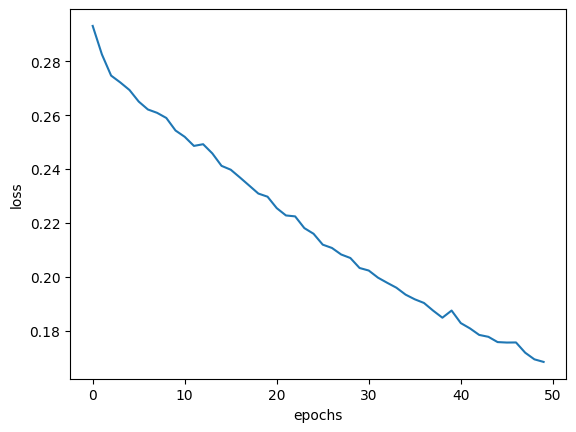

In [25]:
plt.plot(pred_model.history["loss"])
plt.xlabel('epochs')
plt.ylabel('loss')

In [53]:
def predict_next_note(keras_model: tf.keras.Model,notes:np.ndarray,
                      temperature :float =1.0):
    assert temperature>0
    inputs=tf.expand_dims(notes,axis=0)
    predictions=keras_model.predict(inputs)
    pitch_logits=predictions["pitch"]
    print(f"Predictions of step-->{predictions['step']}")
    print(f"Predictions of duration-->{predictions['duration']}")
    step = tf.convert_to_tensor(predictions["step"], dtype=tf.float32)
    duration = tf.convert_to_tensor(predictions["duration"], dtype=tf.float32)
    step=tf.maximum(0,step)
    duration=tf.maximum(0,duration)
    print(step.numpy())
    print(duration.numpy())

    pitch_logits/=temperature
    pitch=tf.random.categorical(pitch_logits,num_samples=1)
    pitch=tf.squeeze(pitch,axis=-1)

    return int(pitch),float(step),float(duration)

In [54]:
predictions=model.predict(training_dataset.take(1))
print(predictions["step"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[0.05139164]
 [0.0414332 ]
 [0.10657861]
 [0.11614197]
 [0.08253202]
 [0.05834476]
 [0.10905224]
 [0.05519743]
 [0.04177733]
 [0.06856172]
 [0.04088695]
 [0.19414985]
 [0.12213147]
 [0.11719315]
 [0.09751372]
 [0.07909945]
 [0.05232116]
 [0.02195855]
 [0.06210743]
 [0.14622352]
 [0.03147943]
 [0.05381497]
 [0.03912852]
 [0.09028289]
 [0.10079472]
 [0.03078024]
 [0.05552776]
 [0.03252175]
 [0.04330735]
 [0.10199525]
 [0.04253946]
 [0.06846208]
 [0.06191537]
 [0.06957287]
 [0.04470857]
 [0.04830255]
 [0.10648885]
 [0.06153023]
 [0.0458477 ]
 [0.06452776]
 [0.08091307]
 [0.09319226]]


In [55]:
temp=1.0
predictions=120
sample_notes=np.stack([raw_dataset[key] for key in order],axis=1)
input_notes=(sample_notes[:seq_length]/np.array([vocab_size,1,1]))
print(input_notes)
generated_notes=[]

prev_start=0
for i in range(predictions):
    pitch,step,duration=predict_next_note(model,input_notes,temp)
    print(pitch,step,duration)
    start=prev_start+step
    end=start+duration
    input_note=(pitch,step,duration)
    generated_notes.append((*input_note,start,end))
    input_notes=np.delete(input_notes,0,axis=0)
    input_notes=np.append(input_notes,np.expand_dims(input_note,0),axis=0)
    prev_start=start
generated_notes=pd.DataFrame(generated_notes,columns=(*order,'start','end'))

[[ 0.3515625  -0.13125     0.90208333]
 [ 0.5625      0.13125     0.121875  ]
 [ 0.578125    0.09895833  0.1125    ]
 [ 0.59375     0.09375     0.115625  ]
 [ 0.6015625   0.096875    0.74895833]
 [ 0.4453125   0.00625     0.671875  ]
 [ 0.5625      0.24166667  0.3       ]
 [ 0.4375      0.20625     0.509375  ]
 [ 0.5546875   0.02395833  0.29479167]
 [ 0.5859375   0.20833333  0.334375  ]
 [ 0.4296875   0.23125     0.62395833]
 [ 0.59375     0.00208333  0.59791667]
 [ 0.546875    0.20625     0.28020833]
 [ 0.5390625   0.21770833  0.38541667]
 [ 0.421875    0.015625    0.62395833]
 [ 0.5703125   0.19895833  0.33854167]
 [ 0.578125    0.221875    0.36979167]
 [ 0.4140625   0.03229167  0.61145833]
 [ 0.53125     0.19583333  0.6375    ]
 [ 0.40625     0.22604167  0.59270833]
 [ 0.5390625   0.225       0.53958333]
 [ 0.390625    0.22395833  0.596875  ]
 [ 0.5546875   0.22916667  0.35625   ]
 [ 0.5         0.28854167  0.48333333]
 [ 0.375       0.078125    0.175     ]
 [ 0.390625    0.11979167

In [59]:
generated_notes.head(10)

,pitch,step,duration,start,end
0,51,0.179616,0.400920,0.179616,0.580536
1,40,0.078293,0.420362,0.257909,0.678271
2,48,0.032988,0.378179,0.290898,0.669076
3,51,0.021828,0.491998,0.312725,0.804724
4,44,0.022167,0.430646,0.334892,0.765538
5,48,0.018632,0.371145,0.353524,0.724669
6,51,0.021536,0.333579,0.375060,0.708639
7,44,0.020061,0.298071,0.395121,0.693192
8,48,0.001352,0.303407,0.396474,0.699880
9,76,0.018066,0.249091,0.414539,0.663631


In [60]:
def notes_to_midi(notes:pd.DataFrame , output_file: str ,instrument_name:str,velocity:int):
    pm=pretty_midi.PrettyMIDI()
    instrument=pretty_midi.Instrument(program=pretty_midi.instrument_name_to_program(instrument_name))

    prev_start=0
    for i,note in notes.iterrows():
        start=float(prev_start+note["step"])
        end=float(start+note["duration"])
        note=pretty_midi.Note(velocity=velocity,pitch=int(note["pitch"]),
                              start=start,end=end)
        instrument.notes.append(note)
        prev_start=start
    pm.instruments.append(instrument)
    pm.write(output_file)

    return pm
    
    

In [61]:
output_file="output.midi"
final_output=notes_to_midi(generated_notes,output_file=output_file,instrument_name=instrument_name,velocity=100)